# 1. Temporal Patterns

We look only at the focus-crimes in the exercise below

In [1]:
focuscrimes = {'WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'}

We have been asked to cover the following four areas:
* *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2020/master/files/weekdays.png). Hint for comment: Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?
* *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
* *The 23 hour cycle*. We'll can also forget about weekday and simply count up the number of each crime-type that occurs in the entire dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
* *Hours of the week*. But by looking at just 23 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

## 1.1 Weekly patterns

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime

<Figure size 432x288 with 0 Axes>

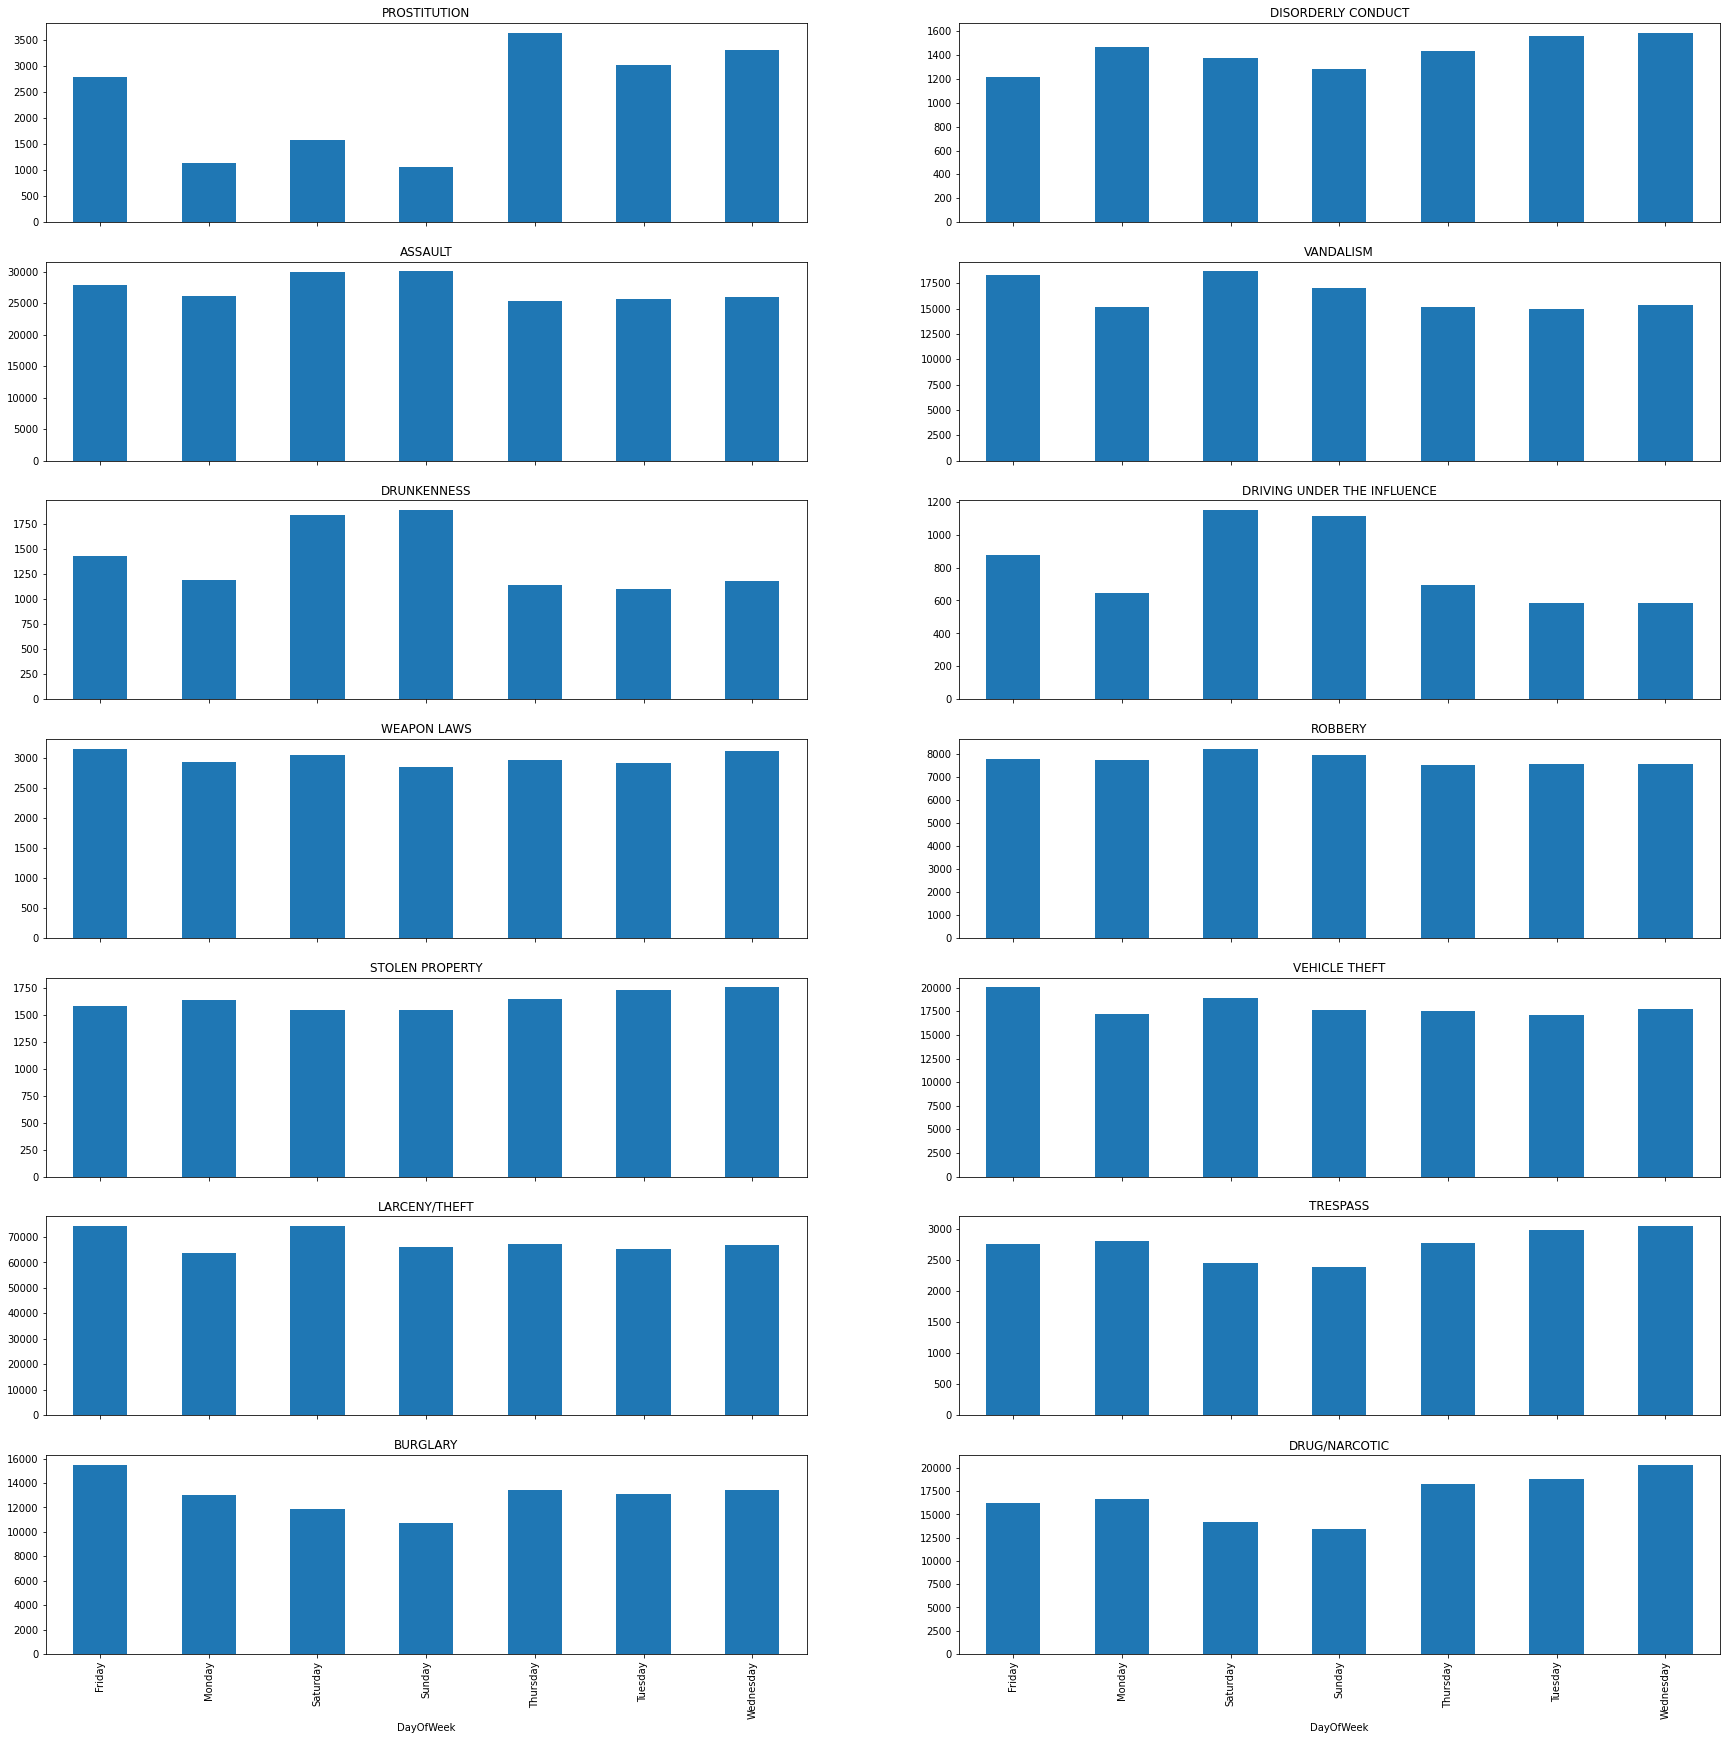

In [3]:
df = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

plt.subplots_adjust(wspace=2, hspace=10)
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(30,30), sharex=True)
df['Date'] = pd.to_datetime(df['Date'])

for ax, crime in zip(axes.flat, focuscrimes):
    df['Date'].loc[(df['Category']==crime)].groupby(df.DayOfWeek).agg('count').plot(kind='bar', ax=ax, title=crime)
    
_ = plt.show()

## 1.2 The Months

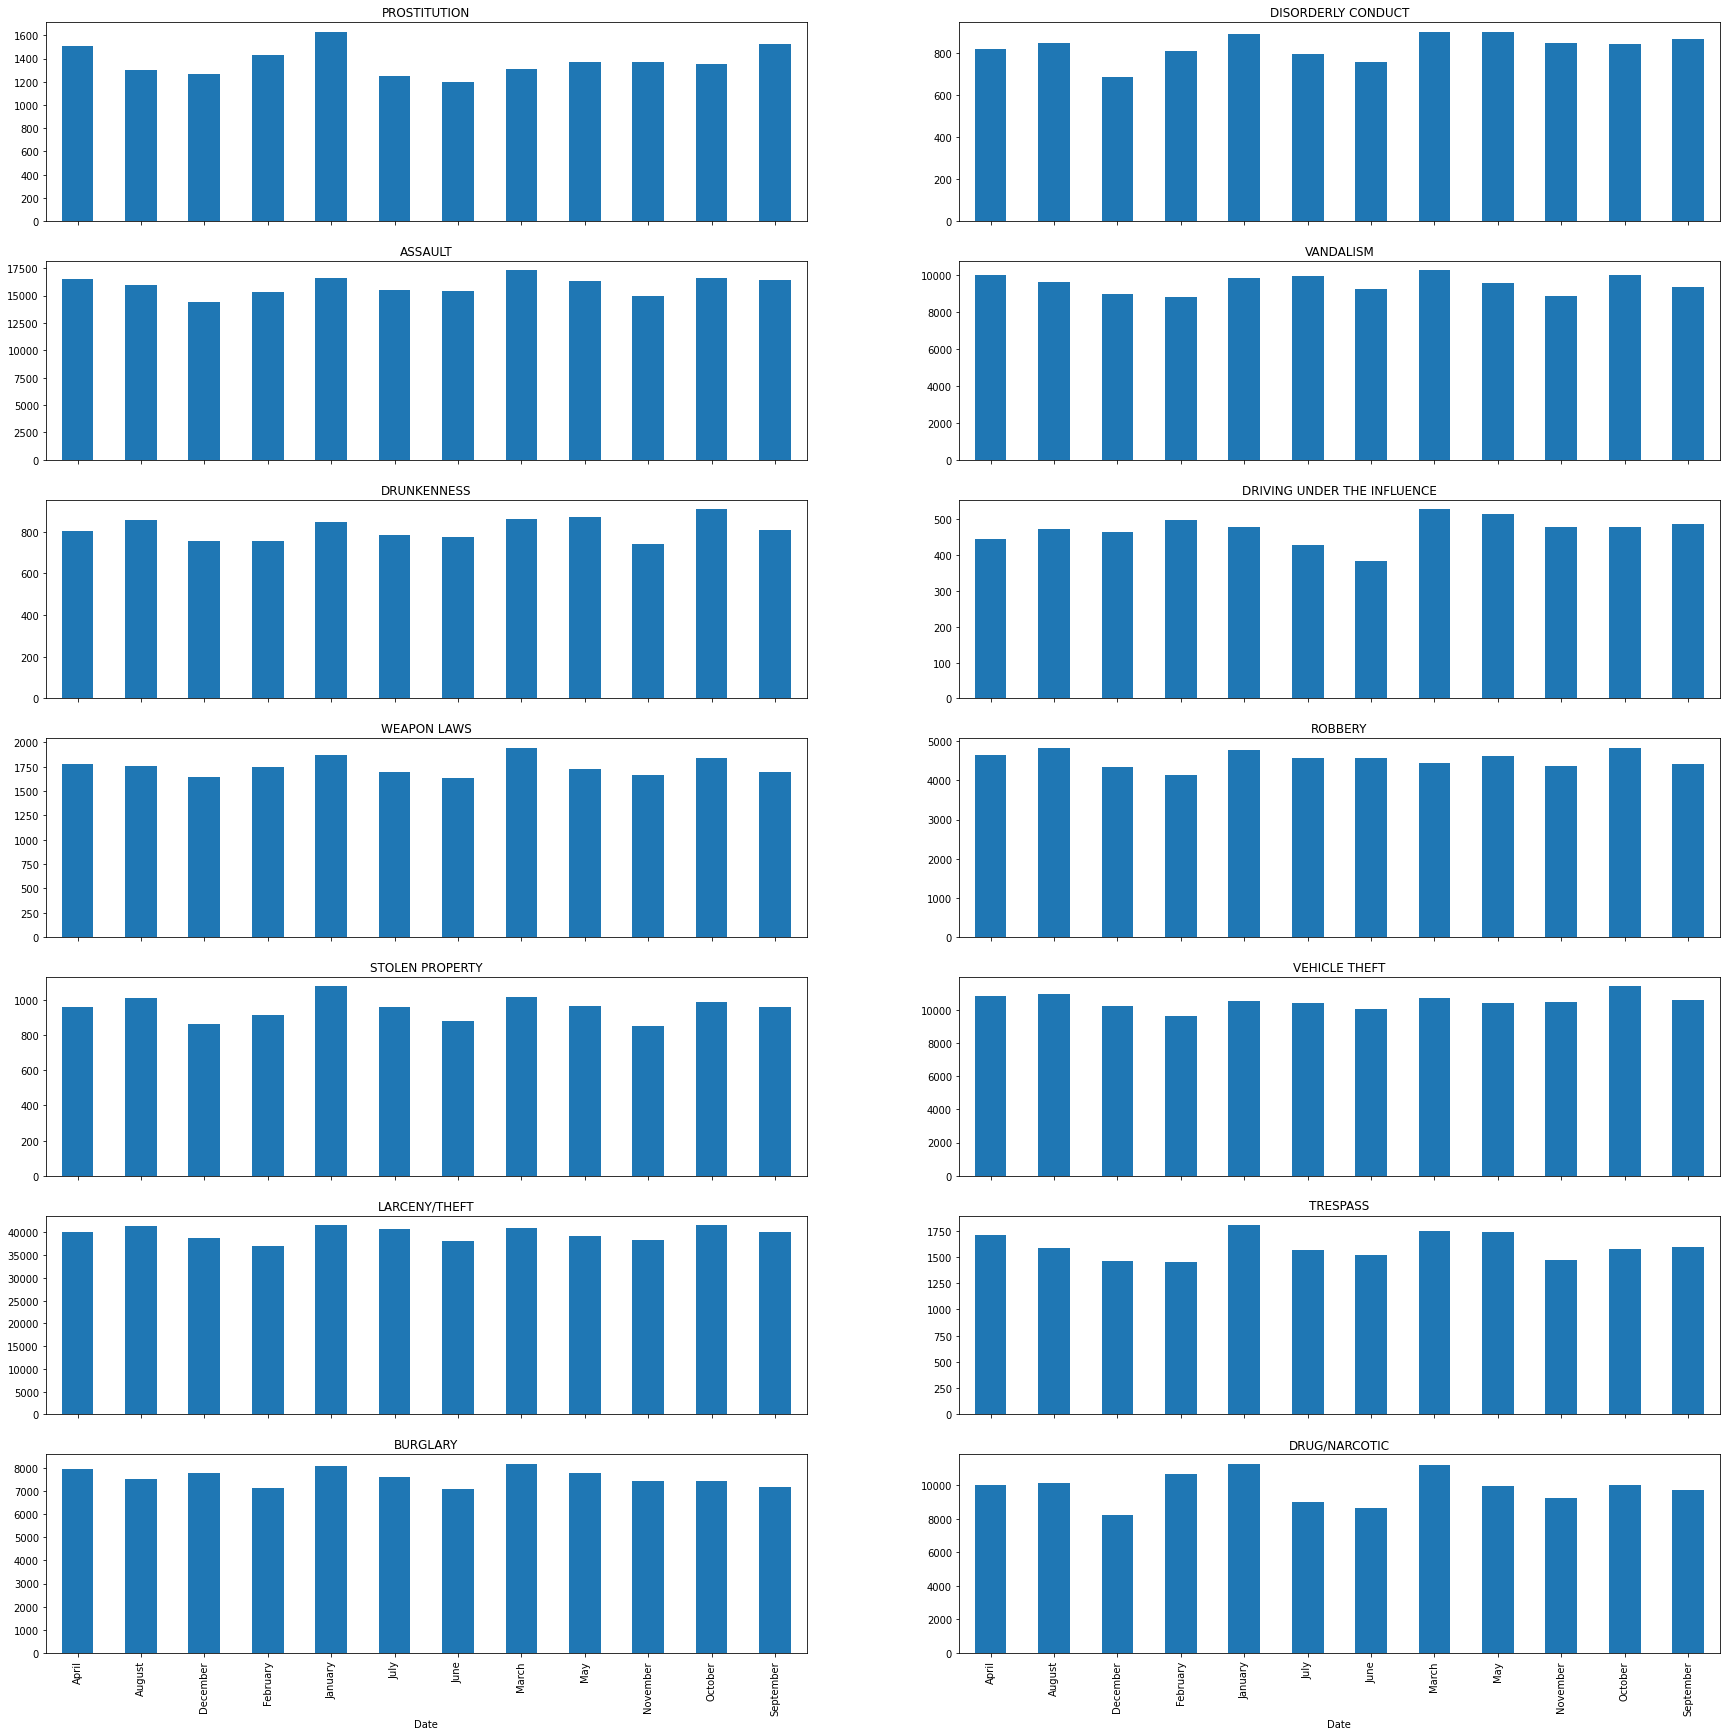

In [4]:
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(30,30), sharex=True)
months = df.Date.dt.strftime('%B')
for ax, crime in zip(axes.flat, focuscrimes):
    df['Date'].loc[(df['Category']==crime)].groupby(months).agg('count').plot(kind='bar', ax=ax, title=crime)
plt.show()

## 1.3 The 24 hour cycle

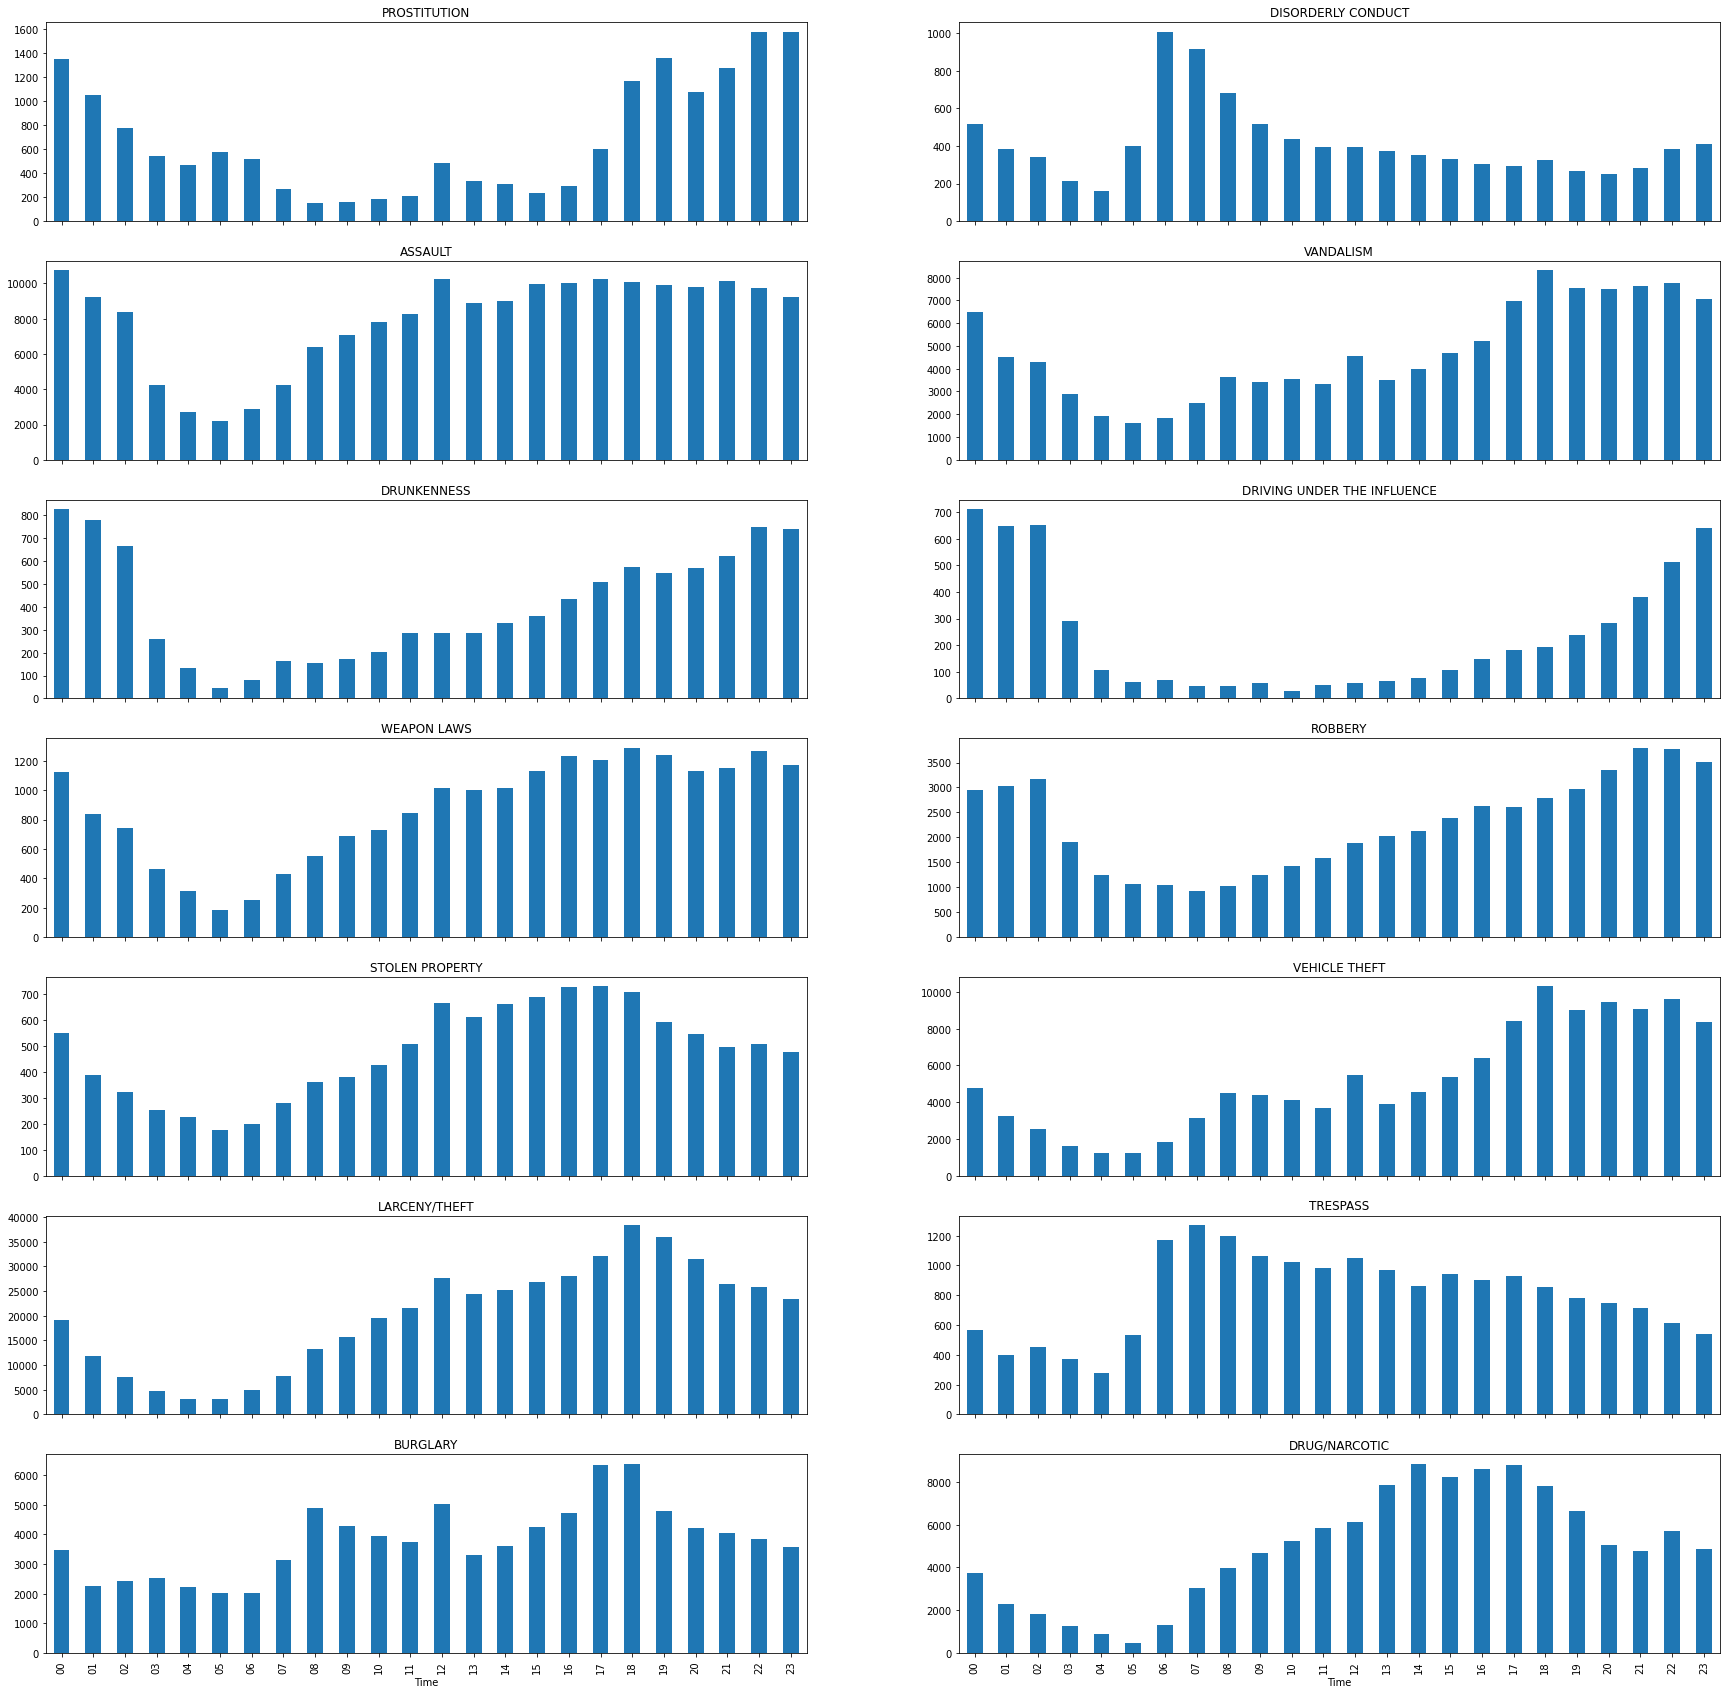

In [5]:
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(30,30), sharex=True)
df['Time'] = pd.to_datetime(df['Time'])
hours = df.Time.dt.strftime('%H')
for ax, crime in zip(axes.flat, focuscrimes):
    df['Date'].loc[(df['Category']==crime)].groupby(hours).agg('count').plot(kind='bar', ax=ax, title=crime)
plt.show()

## 1.4 Hours of the week

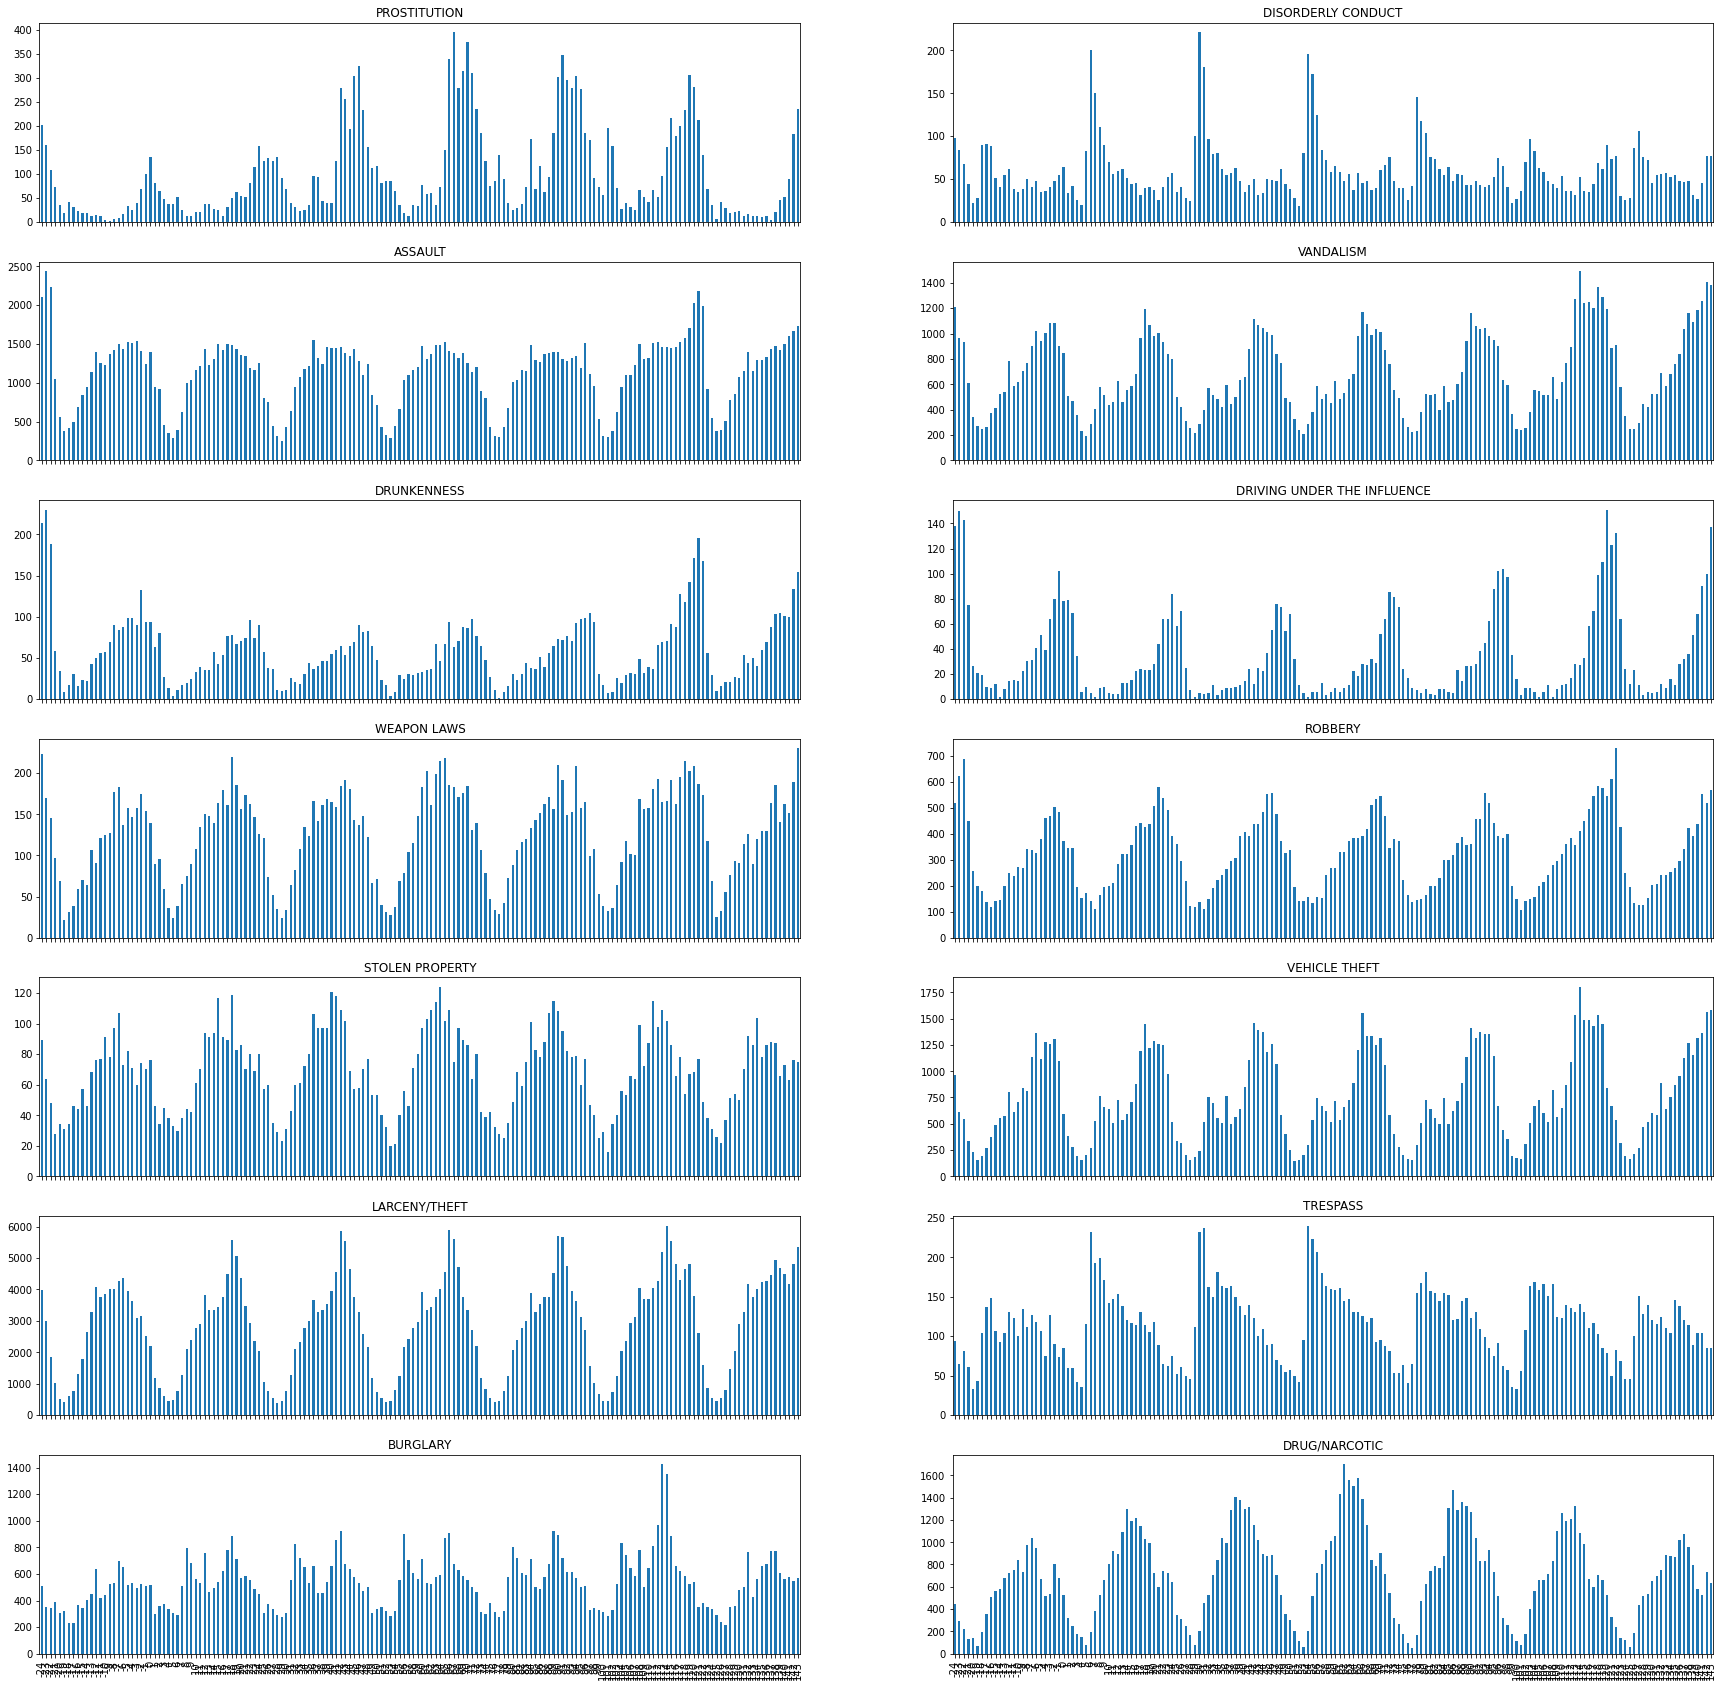

In [6]:
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(30,30), sharex=True)
weekday_as_number = df.Date.dt.strftime('%w').astype(int)-1
hours_of_week = weekday_as_number*24+hours.astype(int)


for ax, crime in zip(axes.flat, focuscrimes):
    df['Date'].loc[(df['Category']==crime)].groupby(hours_of_week).agg('count').plot(kind='bar', ax=ax, title=crime)

# 2 Thinking about data and visualization

*Excercise:* Questions for the [second video lecture](https://www.youtube.com/watch?v=yiU56codNlI).
* As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?
* What is the difference between a bar-chart and a histogram?
* I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it. 

## 2.1 Pearson Correlation

The pearson correlation presents a way of summarizing a scatter plot into a value between -1 and 1, denoting the correlation between two variables. The Pearson Correlation is calculated using the following formula:

$\rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}$

### How it works
Write some text here

### Where it does not work
An example is Anscombe's quartet

## 2.2 Bar chart vs histogram?

While a bar chart represents categorical data, a histogram represents quantitative data. E.g. a bar chart can be used to show the number of different types of cars ("Red cars", "Blue cars" and "Green Cars"). A histogram can be used to XXXXX.

## 2.3 Bin-size

There are many ways to choose bin-size. A frequently used method is Sturge's rule. Sturge's rule is built around the following formula: 

$K = 1 + 3.322 \log N$

Where K is the number of bins and N is the number of observations in a set.

## 3 Generating important plot types

*Excercise*: Let us recreate some plots from DAOST but using our own favorite dataset.

## 3.1 Jitter plot
* First, let's make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the $x$-axis and create vertical jitter.

In [10]:
df.Time = df.Time.apply(lambda x: x.time())

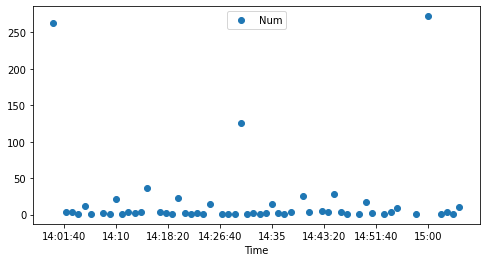

In [16]:
start_month = df.Date > datetime.datetime(year=2009, month=1, day=1)
end_month = df.Date < datetime.datetime(year=2009, month=7, day=1)
values = df.Time.loc[(df.Category == 'LARCENY/THEFT') & (start_month) & (end_month) & 
                     (df.Time > datetime.time(13,59)) & 
                     (df.Time <= datetime.time(15,5))].groupby(df.Time).agg("count")

df2 = values.to_frame()
df2.columns = ["Num"]
df2.reset_index(inplace=True)
_ = df2.plot(x='Time', y='Num', lw=0, marker='o', figsize=(8,4))

## 3.2 Histograms
* Now for some histograms (please create a crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). (I think the GPS data could be fun to understand from this perspective.) 
  * This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
  * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 

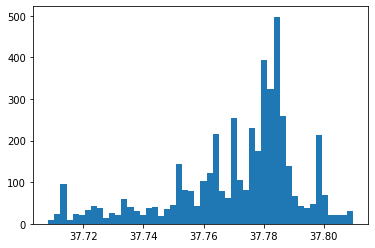

In [15]:
df['Latitude'] = df.location.apply(lambda x: float(x.replace("POINT (", "").replace(")", "").split()[1]))
df['Longitude'] = df.location.apply(lambda x: float(x.replace("POINT (", "").replace(")", "").split()[0]))
drunk = df.loc[((df.Category == "DRUNKENNESS")) & (start_month) & (df.Date < datetime.datetime(year=2015, month=7, day=1))]
vandal = df.loc[((df.Category == "VANDALISM")) & (start_month) & (df.Date < datetime.datetime(year=2015, month=7, day=1))]
_ = plt.hist(drunk.Latitude, 50)

# 4 A bit of geo-data

## 4.1 Plot SF

## 4.2 Plot the SF City Hall

## 4.3 Plot Drug/Narcotics

# 5 Errors in the data

In the exercises, 3 different data errors were found:
1. In the hourly activity for `PROSTITUTION` something surprising is going on on Thursday. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/prostitution_hourly.png), where I've highlighted the phenomenon I'm talking about.
2. When we investigated the details of how the timestamps are recorded using jitter-plots, we saw that many more crimes were recorded e.g. on the hour, 15 minutes past the hour, and to a lesser in whole increments of 10 minutes. Crimes didn't appear to be recorded as frequently in between those round numbers. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/jitter_plot.png), where I've highlighted the phenomenon I'm talking about.
3. And finally, today we saw that the Hall of Justice seemed to be an unlikely hotspot for sex offences. Remind yourself [**here**](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/crime_hot_spot.png).

For each of the three examples above, describe in your own words how the data-errors I call attention to above can bias the binned versions of the data. Also briefly mention how not noticing these errors can result in misconceptions about the underlying patterns of what's going on in San Francisco (and our modeling).

## 5.1 Prostitution data

## 5.2 Recording of timestamps

## 5.3 Hall of Justice